In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

### Задание 1
С помощью метода квадратур найдите приближенное решение уравнения:

#### $y(x)=\frac{5}{6}x+\frac{1}{2}\int\limits_0^1{xsy(s)ds};\ \ x \in [0;1]$

Если его точное решение $y(x)=x$

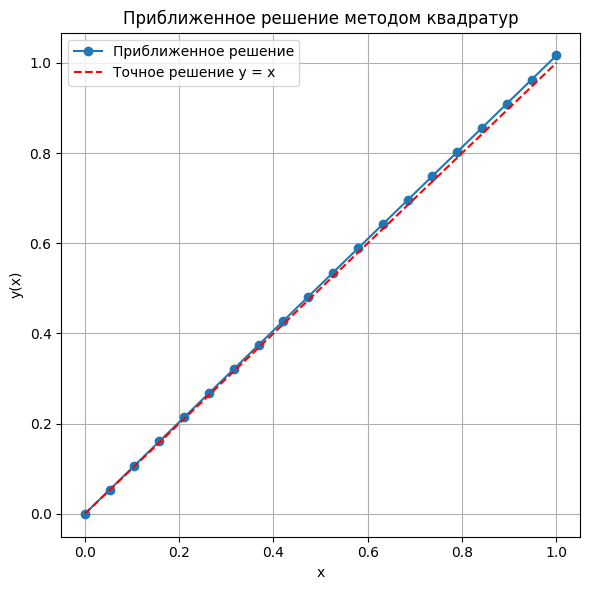

In [3]:
def solve_quadrature(N):
    x = np.linspace(0, 1, N)
    h = 1 / (N - 1)

    A = np.eye(N)
    b = np.zeros(N)

    for i in range(N):
        xi = x[i]
        b[i] = (5 / 6) * xi
        for j in range(N):
            sj = x[j]
            A[i, j] -= (h / 2) * xi * sj

    y = np.linalg.solve(A, b)

    return x, y


N = 20
x, y_approx = solve_quadrature(N)

plt.figure(figsize=(6, 6))

plt.plot(x, y_approx, 'o-', label="Приближенное решение")
plt.plot(x, x, 'r--', label="Точное решение y = x")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.grid()
plt.title("Приближенное решение методом квадратур")

plt.tight_layout()
plt.show()

### Задание 2
С помощью метода вырожденных ядер найдите приближенное решение уравнения:
#### $y(x)+\int \limits_0^1 {x(e^{xs}-1)y(s)ds=e^x-1};\ \ x \in [0;1]$
Точным решением уравнения является функция $y(x)=1$

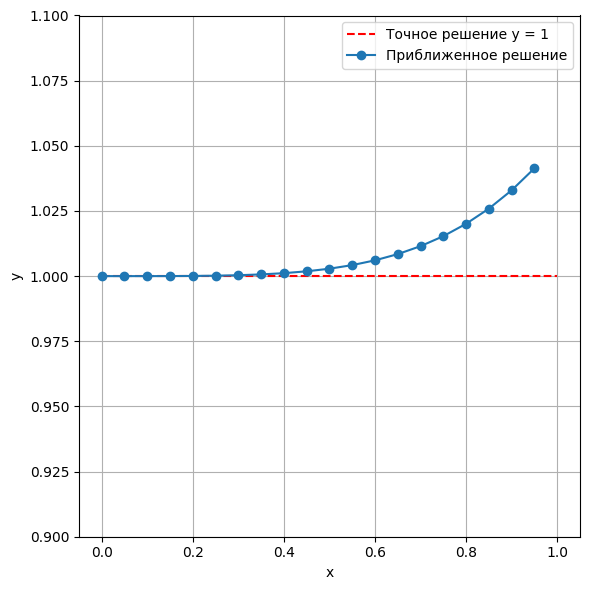

In [9]:
def alpha(t):
    return [t**2, t**3, t**4, t**5]

def beta(t):
    return [t, 1/2*t**2, 1/6*t**3, 1/24*t**4]

def bfun(t, m, f):
    return beta(t)[m]*f(t)

def Aijfun(t, m, k):
    return beta(t)[m]*alpha(t)[k]

a2 = 0
b2 = 1
Lambda = -1
h = 0.05
x2 = np.arange(a2, b2, h)
f = lambda t: np.exp(t) - t

n = len(alpha(0))
X = np.eye(n)
Y = np.zeros((n, 1))

for i in range(n):
    Y[i] = quad(bfun, a2, b2, args=(i, f))[0]
    for j in range(n):
        X[i][j] -= Lambda * quad(Aijfun, a2, b2, args=(i, j))[0]

C = np.linalg.solve(X, Y)
approx2 = f(x2) + Lambda * sum(C[i]*alpha(x2)[i] for i in range(2))

x2_exact = np.linspace(a2, b2, 10)
exact2 = np.ones(len(x2_exact))

plt.figure(figsize=(6, 6))

plt.plot(x2_exact, exact2, "r--", label="Точное решение y = 1")
plt.plot(x2, approx2, 'o-', label="Приближенное решение")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.ylim(0.9, 1.1)

plt.tight_layout()
plt.show()
